# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [50]:
# Libraries
import pandas as pd
import scipy as sp
import numpy as np
from scipy import stats
import statistics
import matplotlib
from matplotlib import pyplot as plt

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [9]:
df=pd.read_csv(r"C:\Users\User\Ironhack\Lab deliverables\Week 5\20 November\lab-linear-regression-correlation\data\absences.csv")

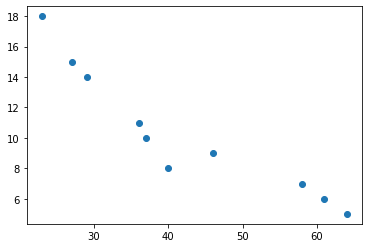

In [15]:
# your code here
plt.scatter("Age", "Absences", data=df,)



In [ ]:
# your comments here
#Looks like we were right

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [27]:
sum(df["Age"]**2)

19661

In [62]:
# your code here
def whaddup(x,y):
    if len(x)==len(y):
        Sx=sum(x)
        Sy=sum(y)
        Sx2=sum(x**2)
        Sy2=sum(y**2)
        Sxy=sum(x*y)
        n=len(x)
        slope=((n*Sxy)-(Sx*Sy))/((n*Sx2)-(Sx**2))
        intercept=((Sy*Sx2)-(Sx*Sxy))/((n*Sx2)-(Sx**2))
        print("The slope of the regression line is "+str(slope)+ " and the intercept is "+ str(intercept))
    else:
        print("Your columns are of unequal lengths")
 

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [65]:
# your code here
whaddup(df["Age"],df["Absences"])



The slope of the regression line is -0.2681088337033404 and the intercept is 21.587381898910632


In [66]:
# your comments here
#The slope tells us that, on average, for every year added to a person's age, their absences decrease by .2
#The intercept is useless here, as it tells as that a 0-year old person would have 21 absences.

In [103]:
df["Age"]
import math

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [128]:
# your code here
def Co(x,y):
    if len(x)== len(y):
        n=len(x)
        mean_x=statistics.mean(x)
        mean_y=statistics.mean(y)
        tot_sum=0
        tot_sum2=0
        tot_sum3=0
        for i in range(n):
            tot_sum=tot_sum+((x[i]-mean_x)*(y[i]-mean_y))
            tot_sum2=tot_sum2+(x[i]-mean_x)**2
            tot_sum3=tot_sum3+(y[i]-mean_y)**2
            
        print("covariance: "+str(tot_sum/n))
        print("correlation: "+str(tot_sum/math.sqrt(tot_sum2*tot_sum3)))
    else:
        print("Your columns are of unequal lengths")

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [129]:
# your code here
Co(df["Age"], df["Absences"])

covariance: -51.92999999999999
correlation: -0.9325434092481012


In [112]:
# your comments here
#Highly negatively correlated

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [130]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [131]:
# your code here
Co(ironbeers_df["X"], ironbeers_df["Y"])

covariance: 10.5
correlation: 0.9770084209183943


In [ ]:
# your comments here
#People are listening to you

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

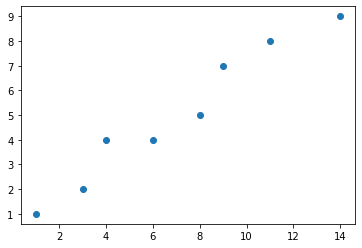

In [135]:
# your code here
plt.scatter(ironbeers_df["X"], ironbeers_df["Y"])

In [ ]:
# your comments here
#Looks like a positive correlation to me

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [136]:
# your code here
whaddup(ironbeers_df["X"], ironbeers_df["Y"])

The slope of the regression line is 0.6363636363636364 and the intercept is 0.5454545454545454


In [ ]:
# your comments here
#For every time you tell someone to stay, .6 more people stay, on average.
#If you told 0 people to stay, only half a person would stay

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here
#You are not the reason why people are not staying. You are beautiful and exercise great influence over other Ironhackers

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here